# TIME SERIES ANALYSIS

Burada Time Series Analysis (Zamana Bağlı Veri Analizi) çalışması yapacağım.

### Regression Time Series Analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
df=pd.read_csv("DailyDelhiClimateTrain.csv")

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
px.line(df,x='date', y='meantemp',title='New Delhi Temperature')

In [8]:
px.line(df,x='date', y='humidity',title='New Delhi Humidity')

In [9]:
px.line(df,x='date', y='wind_speed',title='New Delhi Wind Speed')

In [11]:
px.scatter(df,x='humidity', y='meantemp', size='meantemp', trendline='ols')

In [13]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [14]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [15]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


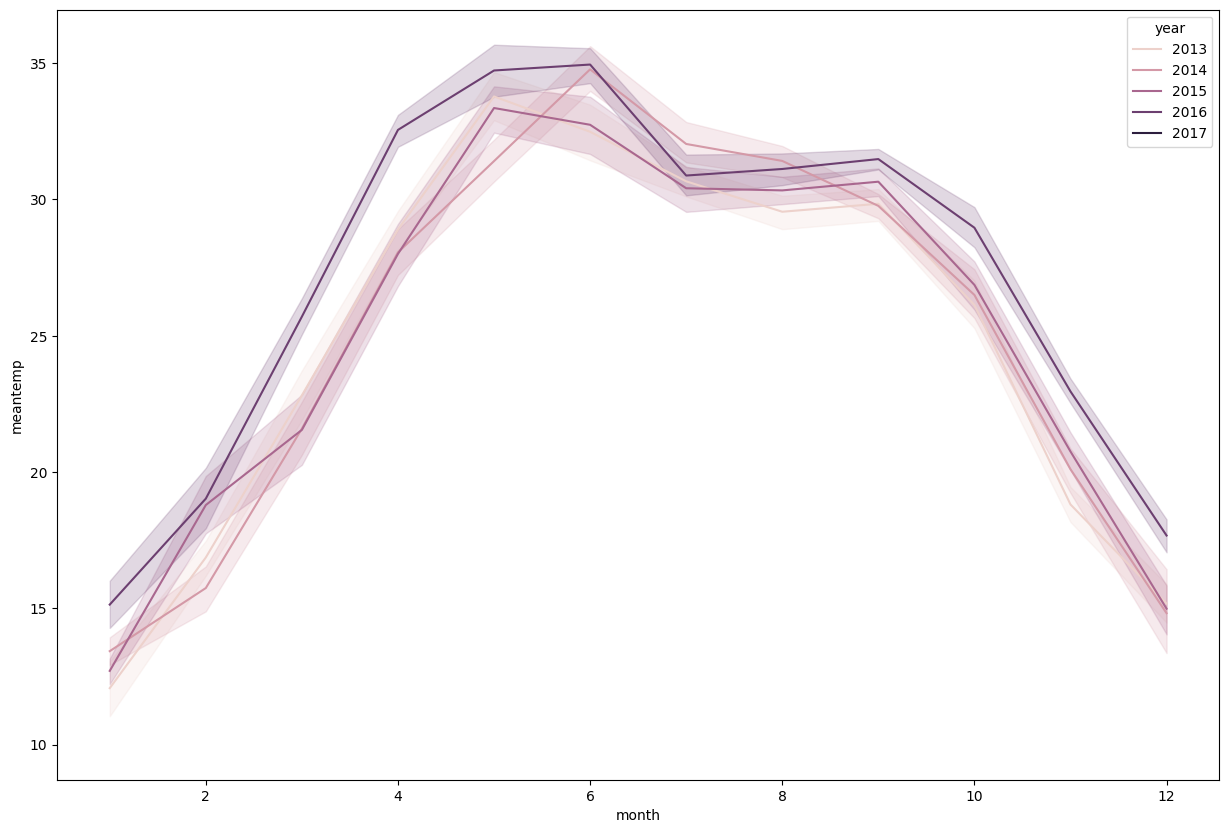

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x='month',y='meantemp', hue='year');

In [21]:
#pip install prophet

In [22]:
forecast=df.rename(columns={'date':'ds','meantemp':'y'})

In [24]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)

16:46:24 - cmdstanpy - INFO - Chain [1] start processing
16:46:25 - cmdstanpy - INFO - Chain [1] done processing
